#**Aerofit Project**




> Name : Yash Agarwal<br>
  ID : 2023BCS10121<br>


---

# **About Aerofit**<br>
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range
including machines such as treadmills, exercise bikes, gym equipment, and fitness
accessories to cater to the needs of all categories of people.

# **Business Problem**<br>
The market research team at AeroFit wants to identify the characteristics of the target
audience for each type of treadmill offered by the company, to provide a better
recommendation of the treadmills to the new customers. The team decides to investigate
whether there are differences across the product with respect to customer characteristics.
1.   Perform descriptive analytics to create a customer profile for each AeroFit treadmill
product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute
all conditional and marginal probabilities along with their insights/impact on the
business.

<br>

---
<br>
<h2><b>Importing libraries</b></h2>


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2><b>Importing the dataset</b></h2>

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749
To: /content/aerofit_treadmill.csv?1639992749
100% 7.28k/7.28k [00:00<00:00, 21.6MB/s]


In [ ]:
df = pd.read_csv("/content/aerofit_treadmill.csv?1639992749")

In [ ]:
df_copy = pd.read_csv("/content/aerofit_treadmill.csv?1639992749")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120




---


<h1><b>1. <u>Basic Analysis</u></b></h1>

In [ ]:
df.shape

(180, 9)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

## **Insights:**


*   Number of rows = 180
*   Number of Columns = 9
*   There are no missing values in the given data

<br>

---
<br>



<h1><b>2. <u>Non-Graphical Analysis: Value counts & Unique Attributes</u></b></h1>

<h3><b>2.1 Product Column</b></h3>

In [ ]:
product_count = df['Product'].value_counts().reset_index()
product_count.columns = ['Product',"Count"]
product_count['Percentage'] = ((product_count['Count']/180)*100).round(2)
product_count

,Product,Count,Percentage
0,KP281,80,44.44
1,KP481,60,33.33
2,KP781,40,22.22


<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>3 (KP281 ,KP481 ,KP781 )</b>
*   This table shows the value count for each product and we can observe that <b>KP281</b> is the most selling product contributing to <b>44.44%</b> of the sales followed by KP481 at 33.33% and KP781 at 22.22%.


<br>


<h3><b>2.2 Age Column</b></h3>

In [ ]:
age_count = df['Age'].value_counts().reset_index()
age_count.columns = ['Age',"Count"]
age_count['Percentage'] = ((age_count['Count']/180)*100).round(2)
age_count.head()

,Age,Count,Percentage
0,25,25,13.89
1,23,18,10.00
2,24,12,6.67
3,26,12,6.67
4,28,9,5.00


In [ ]:
age_count['Percentage'][(age_count.Age>=18)&(age_count.Age<=30)].sum().round(0)

67.0

<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>31</b>(Depicts that the users lie in the wide range of age group)
*   This table shows that around <b>67%</b> of the users are of the age bracket of <b>[18-30]</b> , which means they are Young and buy the treadmills for their health.


<h3><b>2.3 Gender Column</b></h3>

In [ ]:
gender = df['Gender'].value_counts().reset_index()
gender.columns = ['Gender', 'Count']
gender['Percentage'] = ((gender['Count']/180)*100).round(2)
gender

,Gender,Count,Percentage
0,Male,104,57.78
1,Female,76,42.22


<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>2 (Female,Male)</b>
*   This table shows that around <b>58%</b> of the users are <b>Males</b> while <b>Females</b> are <b>42%</b>.


<h3><b>2.4 Marital Status Column</b></h3>

In [ ]:
maritalStatus = df['MaritalStatus'].value_counts().reset_index()
maritalStatus.columns = ['Status', 'Count']
maritalStatus['Percentage'] = ((maritalStatus['Count']/180)*100).round(2)
maritalStatus

,Status,Count,Percentage
0,Partnered,107,59.44
1,Single,73,40.56


<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>2 (Single, Partnered)</b>
*   This table shows that <b>60%</b> of the users are <b>Married</b> while <b>Singles</b> account for <b>40%</b> of the users.


<h3><b>2.5 Usage Column</b></h3>

In [ ]:
usage = df['Usage'].value_counts().reset_index()
usage.columns = ['Usage', 'Count']
usage['Percentage'] = ((usage['Count']/180)*100).round(2)
usage

,Usage,Count,Percentage
0,3,69,38.33
1,4,52,28.89
2,2,33,18.33
3,5,17,9.44
4,6,7,3.89
5,7,2,1.11


In [ ]:
usage['Percentage'][(usage.Usage>=2)&(usage.Usage<=4)].sum().round(2)

85.55

<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>6</b>
*   This table shows that majority of the users <b>(85.55%)</b> use the treadmill around (<b>2-4</b>)


<h3><b>2.6 Rating Column</b></h3>

In [ ]:
rating = df['Fitness'].value_counts().reset_index()
rating.columns = ['FitnessRating', 'Count']
rating['Percentage'] = ((rating['Count']/180)*100).round(2)
rating

,FitnessRating,Count,Percentage
0,3,97,53.89
1,5,31,17.22
2,2,26,14.44
3,4,24,13.33
4,1,2,1.11


<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>5</b>
*   This table shows around <b>54%</b> of the users have rated their experience <b>3</b>.


<h3><b>2.7 Education Column</b></h3>

In [ ]:
education = df['Education'].value_counts().reset_index()
education.columns = ['Education', 'Count']
education['Percentage'] = ((education['Count']/180)*100).round(2)
education

,Education,Count,Percentage
0,16,85,47.22
1,14,55,30.56
2,18,23,12.78
3,15,5,2.78
4,13,5,2.78
5,12,3,1.67
6,21,3,1.67
7,20,1,0.56


In [ ]:
education['Percentage'][(education.Education >=14)&(education.Education<=16)].sum().round(2)

80.56

<h2><b>Analysis:</b></h2>

*   Unique Attributes = <b>8</b>
*   This table clearly depicts that <b>80.56%</b> of the users have the education level of <b>14-16 years</b>.



<br>


---



<h3><b>Here we have divided the Ages into 3 categories:</b></h3>


*   Young  :- 18-29
*   Middle :- 30-40
*   Old    :- 40-50


In [ ]:
df['AgeGroup'] = pd.cut(df['Age'],bins =[17,29,40,50],labels=['Young','Middle Aged','Old'])
ageGroup = df['AgeGroup'].value_counts().reset_index()
ageGroup.columns = ['AgeGroup', 'Count']
ageGroup['Percentage'] = ((ageGroup['Count']/180)*100).round(2)
ageGroup

,AgeGroup,Count,Percentage
0,Young,113,62.78
1,Middle Aged,55,30.56
2,Old,12,6.67


In [ ]:
df['IncomeGroup']  = pd.cut(df['Income'],bins = [29000,45000,70000,105000],labels=['Low','Medium','High'])
incGroup = df['IncomeGroup'].value_counts().reset_index()
incGroup.columns = ['IncomeGroup', 'Count']
incGroup['Percentage'] = ((incGroup['Count']/180)*100).round(2)
incGroup

,IncomeGroup,Count,Percentage
0,Medium,108,60.00
1,Low,49,27.22
2,High,23,12.78


<h3><b>Here we have divided the Income into 3 categories:</b></h3>


*   Low:- $29000- $45000
*   Medium :- $45001- $70000
*   High   :- $70001- $105000
<br>
<h2><b>Analysis:</b></h2>
The data shows that <b>60%</b> of users fall in the income group of <b>USD45000 - USD70000 </b>

In [ ]:
df['MilesGroup'] = pd.cut(df['Miles'],bins = [20,100,180,360],labels = ['Low','Average','High'])
milesGrp = df['MilesGroup'].value_counts().reset_index()
milesGrp.columns = ['MilesGroup','Count']
milesGrp['Percentage'] = ((milesGrp['Count']/180)*100).round(2)
milesGrp

,MilesGroup,Count,Percentage
0,Low,114,63.33
1,Average,53,29.44
2,High,13,7.22


<h3><b>Here we have divided the Miles into 3 categories:</b></h3>


*   Low  :- 21-100
*   Average :- 101-180
*   High   :- 181-360

<h2><b>Analysis:</b></h2>
The data shows that <b>63%</b> have run about 21-100 Miles which shows that they do not run that often and their usage will be low.




---

<h1><b>3. <u>Missing Value & Outlier Detection</u></b></h1>

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
AgeGroup         0
IncomeGroup      0
MilesGroup       0
dtype: int64

<h2><b>Analysis:</b></h2>
This shows that there are <b>No Missing Values</b> in the given data.


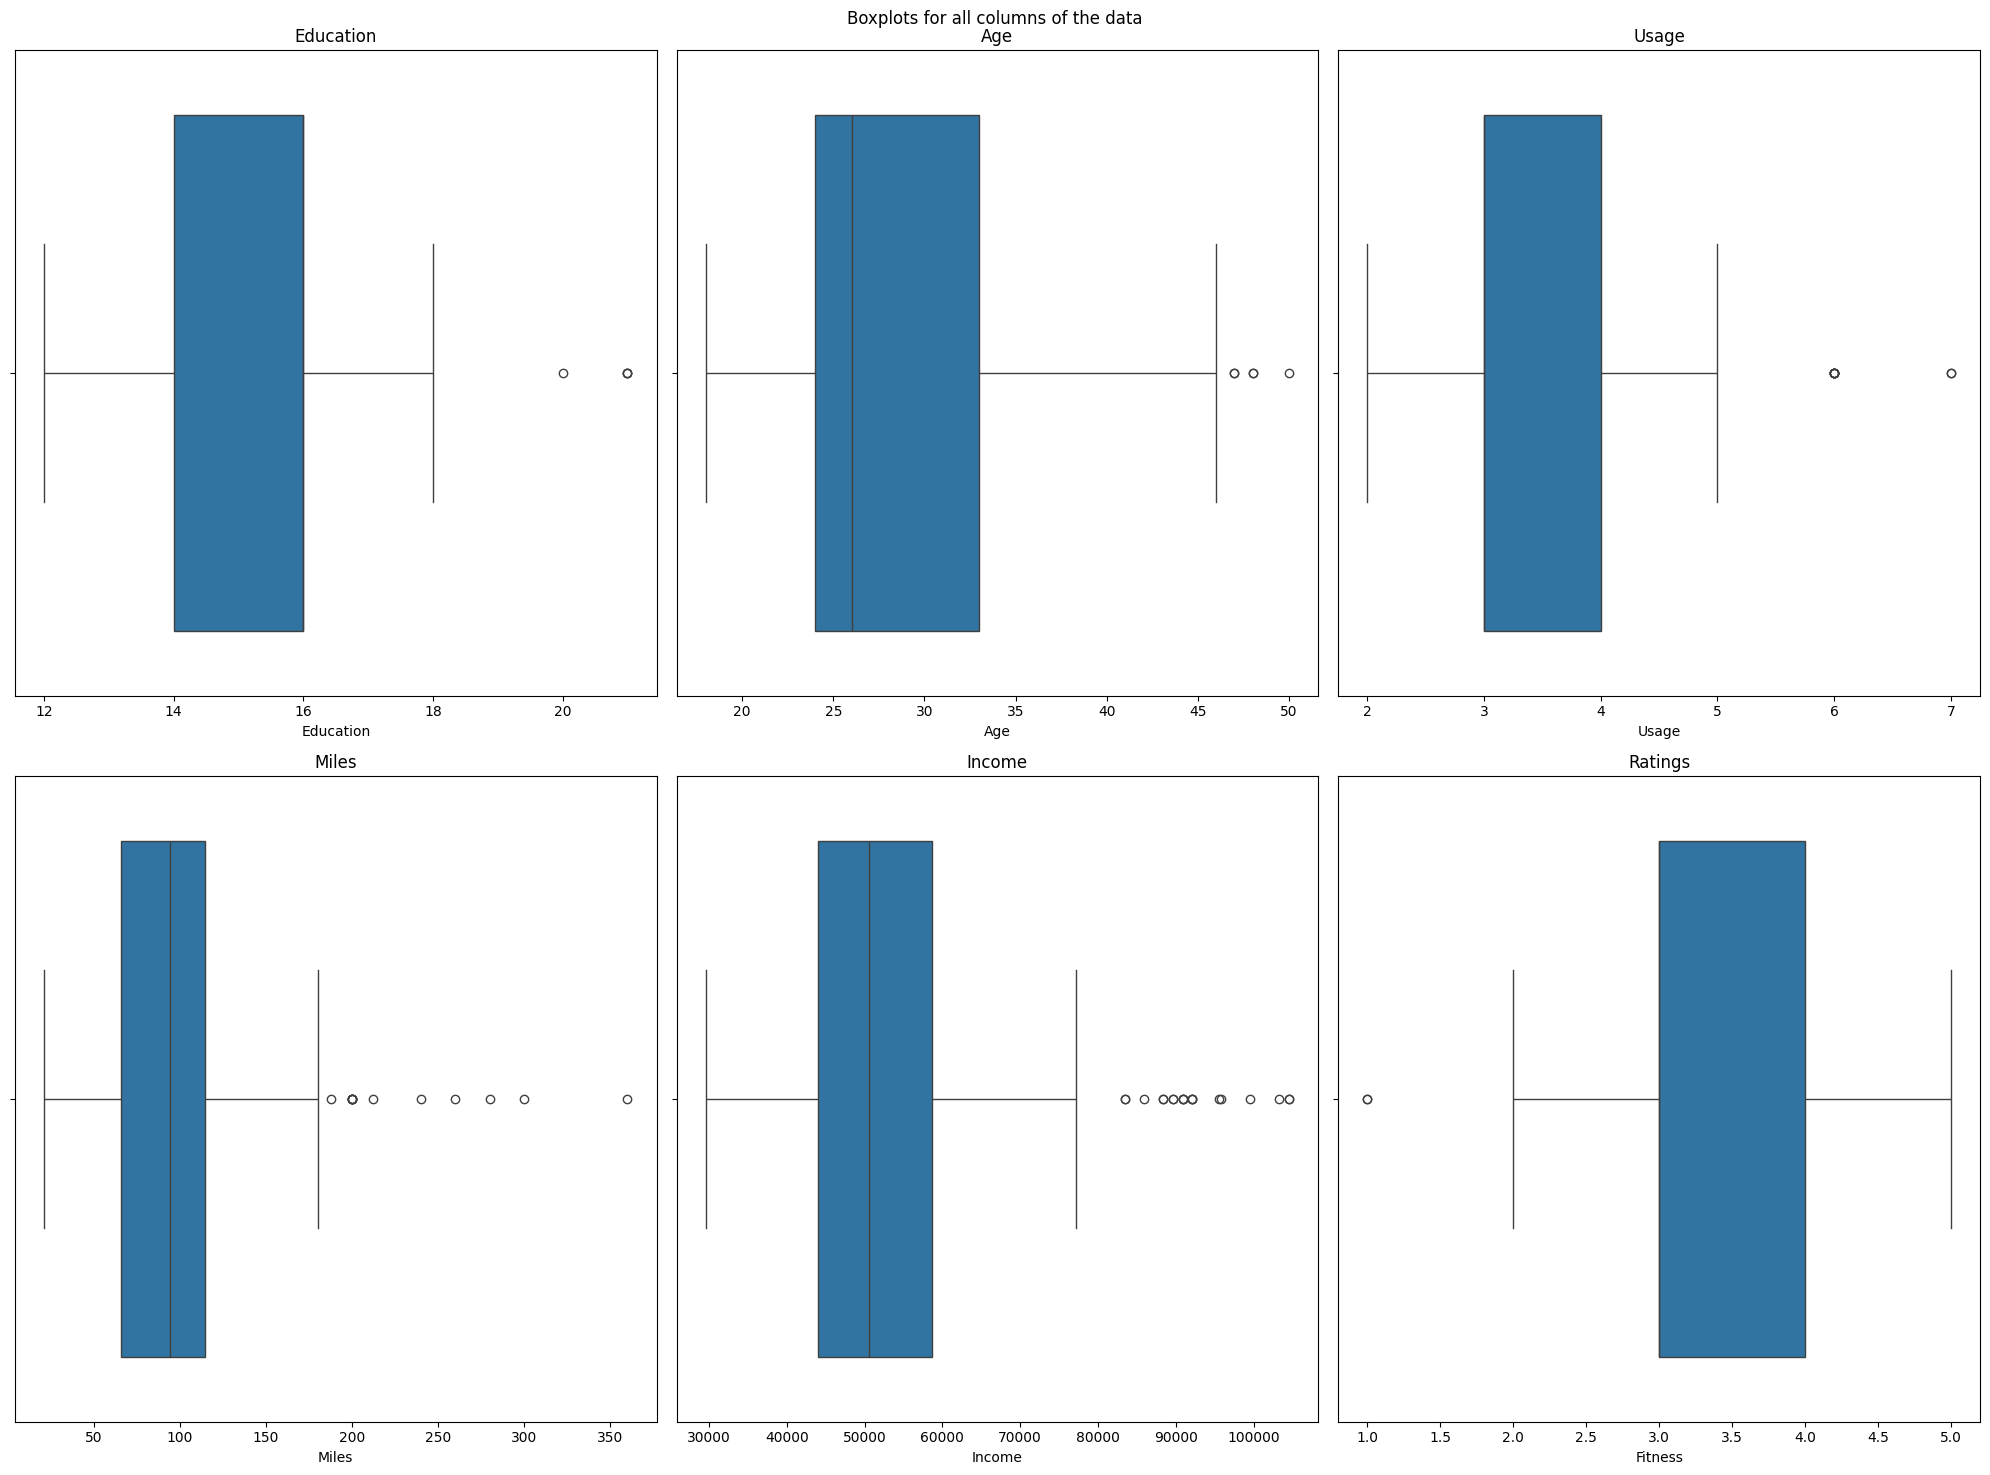

In [ ]:
plt.figure(figsize=(20, 15))

plt.subplot(2, 3, 1)
sns.boxplot(x=df["Education"])
plt.title("Education")

plt.subplot(2, 3, 2)
sns.boxplot(x=df["Age"])
plt.title("Age")

plt.subplot(2, 3, 3)
sns.boxplot(x=df["Usage"])
plt.title("Usage")

plt.subplot(2, 3, 4)
sns.boxplot(x=df["Miles"])
plt.title("Miles")

plt.subplot(2, 3, 5)
sns.boxplot(x=df["Income"])
plt.title("Income")

plt.subplot(2, 3, 6)
sns.boxplot(x=df["Fitness"])
plt.title("Ratings")

plt.suptitle("Boxplots for all columns of the data")
plt.tight_layout()
plt.show()

<h2><b>Observations about Outliers in the columns of Data:</b></h2>


*   <b>Education :</b>There are <b>2</b> outliers as clearly seen in the boxplot.
*   <b>Age :</b>There are very few outliers of <b>Relatively Old Aged</b> people who use the treadmill for their health.
*   <b>Usage :</b>There are outliers in <b>6 and 7</b> depicting a group of people use the treadmill quite often which in turn forms outliers in Miles data.
*   <b>Miles :</b>There are outliers in the higher range of the Miles, which clearly depicts that very few people are daily users and run for a lot.
*   <b>Income :</b> Around <b>10.5%</b> are outliers here but we do not drop them as they can provide valuable insights.
*   <b>Fitness Rating :</b>There are <b>No</b> outliers depicting all values are in the required range.

<br>

---



<h1><b>4.<u>Descriptive Statistics</u></b></h1>

In [ ]:
for col in df.select_dtypes(np.number):
  mean = df[col].mean().round(2)
  standard_deviation = df[col].std().round(2)
  median = df[col].median().round(2)
  q1 = np.percentile(df[col],25)
  q3 = np.percentile(df[col],75)
  IQR = q3-q1
  upper_bound = q3+1.5*IQR
  lower_bound = q1-1.5*IQR
  print(f'--- Descriptive Statistics of', col, 'column ---')
  print(f'Mean :', mean)
  print(f'Standard Deviation :', standard_deviation)
  print(f'Median :',median)
  print(f'25th Percentile :',q1)
  print(f'75th Percentile :',q3)
  print(f'Inter Quartile Range :', IQR)
  print(f'Upper bound:',upper_bound)
  print(f'Lower bound:',lower_bound)
  print()

--- Descriptive Statistics of Age column ---
Mean : 28.79
Standard Deviation : 6.94
Median : 26.0
25th Percentile : 24.0
75th Percentile : 33.0
Inter Quartile Range : 9.0
Upper bound: 46.5
Lower bound: 10.5

--- Descriptive Statistics of Education column ---
Mean : 15.57
Standard Deviation : 1.62
Median : 16.0
25th Percentile : 14.0
75th Percentile : 16.0
Inter Quartile Range : 2.0
Upper bound: 19.0
Lower bound: 11.0

--- Descriptive Statistics of Usage column ---
Mean : 3.46
Standard Deviation : 1.08
Median : 3.0
25th Percentile : 3.0
75th Percentile : 4.0
Inter Quartile Range : 1.0
Upper bound: 5.5
Lower bound: 1.5

--- Descriptive Statistics of Fitness column ---
Mean : 3.31
Standard Deviation : 0.96
Median : 3.0
25th Percentile : 3.0
75th Percentile : 4.0
Inter Quartile Range : 1.0
Upper bound: 5.5
Lower bound: 1.5

--- Descriptive Statistics of Income column ---
Mean : 53719.58
Standard Deviation : 16506.68
Median : 50596.5
25th Percentile : 44058.75
75th Percentile : 58668.0
Inte



---
<br>
<h1><b>5. <u>Visual Analysis</u></b></h1>



<h3><b>5.1 Product Wise Distribution</b></h3>

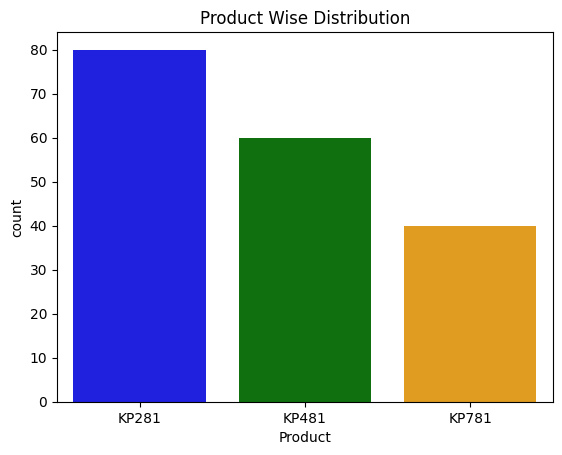

In [ ]:
product_colors = {"KP281": "blue", "KP481": "green", "KP781": "orange"}
sns.countplot(data=df, x= 'Product',hue="Product", order=df["Product"].value_counts().index, palette=product_colors.values(),legend = False)
plt.title("Product Wise Distribution")
plt.show()

<h2><b>Insights:</b></h2>

*   KP281 being the most affordable is the most selling for new comers who want to try the treadmill at low cost , which accounts for 44.44% share.
*   KP481 being the medium level in terms of cost is for mid-level runners who want value for their money.
*   K781 being expensive and advanced has a niche group of buyers who are experienced and run a lot , hence the lowest selling product.



<h3><b>5.2 Gender Distribution and Analysis with respect to the Product</b></h3>

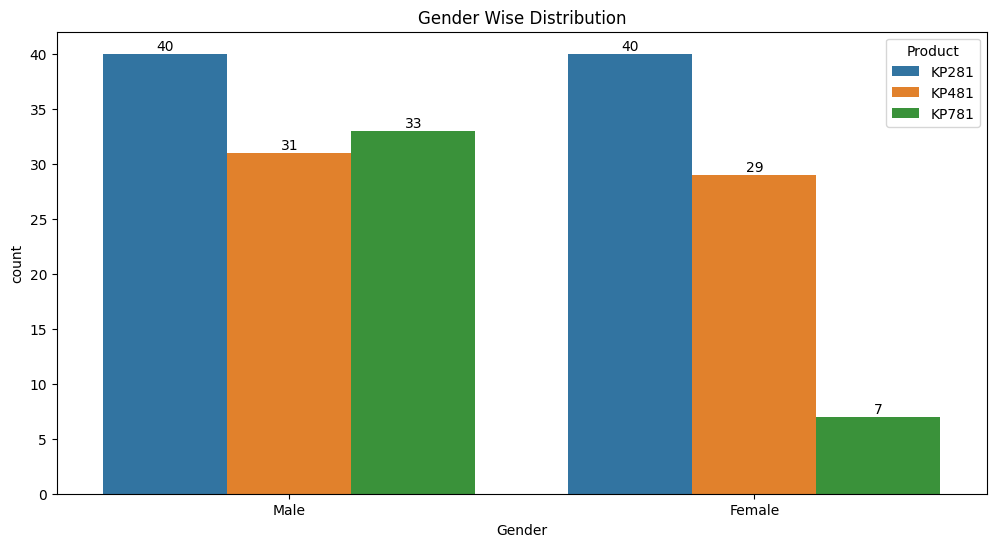

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='Gender', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Gender Wise Distribution')
plt.show()

<h2><b>Insights:</b></h2>


*   Both Female and Male buyers prefer KP281 due to its low cost.
*   The number of female and male users of KP481 are same showcasing not much dependence of this product on gender.
*   Males buy the most expensive KP781 (33 users) as compared to Females(7 users) as it is an advanced machine and very few Females run that much as compared to men . Also it being of high cost makes it less affordable for females like housewife of a middle income household.Adding to this,women are more into Yoga and Gyms than the hardcore running(as compared to Males).


<h3><b>5.3 Education Distribution and Analysis with respect to Product</b></h3>

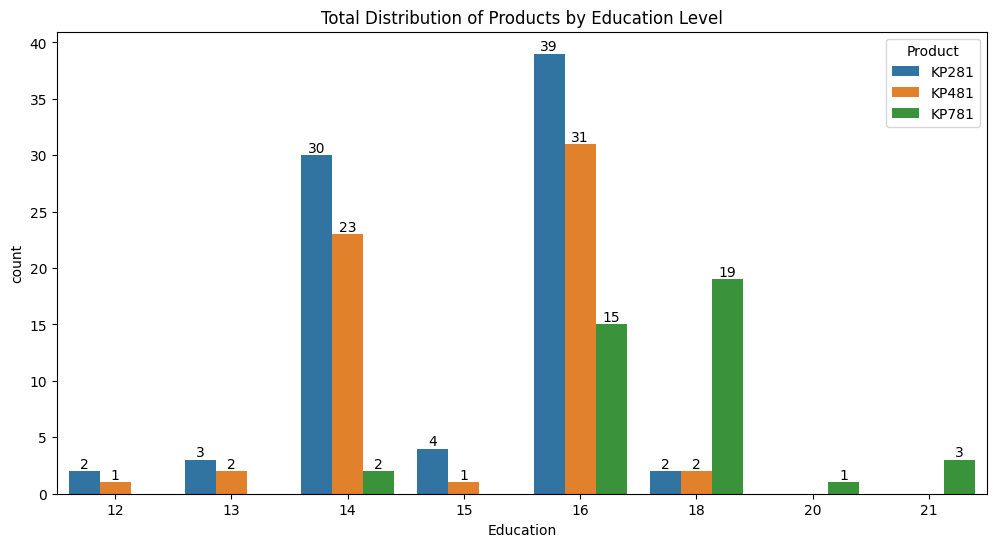

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='Education', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Total Distribution of Products by Education Level')
plt.show()

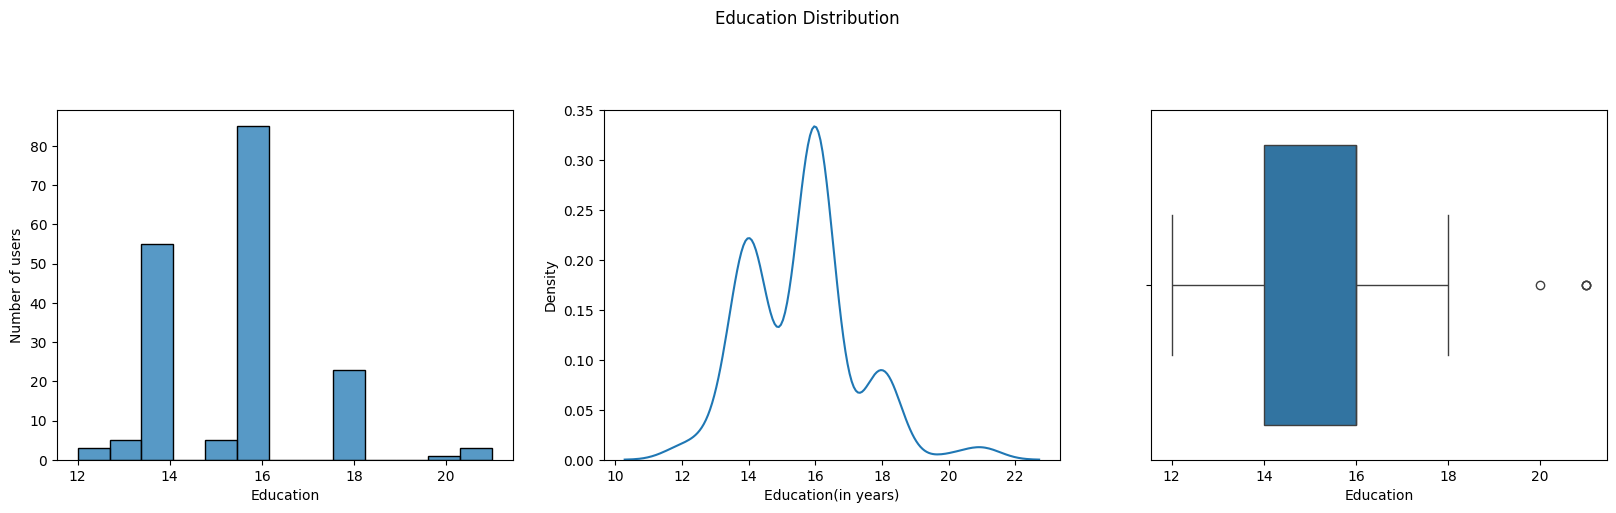

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x="Education")
plt.xlabel("Education")
plt.ylabel("Number of users")

plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Education")
plt.xlabel("Education(in years)")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Education")

plt.suptitle("Education Distribution")
plt.show()

<h2><b>Insights:</b></h2>


*   The most number of products are bought by the education of 14 years and 16 years, where KP281 remains the best seller due to its low cost and less usage.
*   KP481 also is being bought by the same group of 14-16 years as they are more health conscious and not all tend to trust the lowest priced option.
*   There is a significant rise in the sales of KP781 as the Education level increases, opting for the best treadmill and getting awareness about what best works for the health.
*   KP781 is not a favourite choice in the early levels as people don't have much knowledge about it and they don't want to invest heavily so early and that too when they are not going to choose it daily.


<h3><b>5.4 Rating Distribution and Analysis with respect to Products</b></h3>

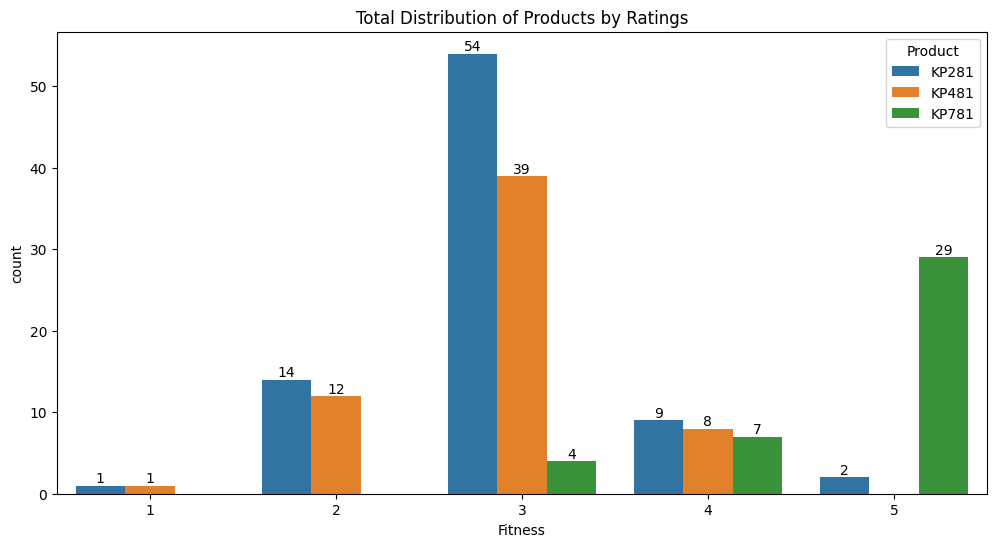

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='Fitness', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Total Distribution of Products by Ratings')
plt.show()

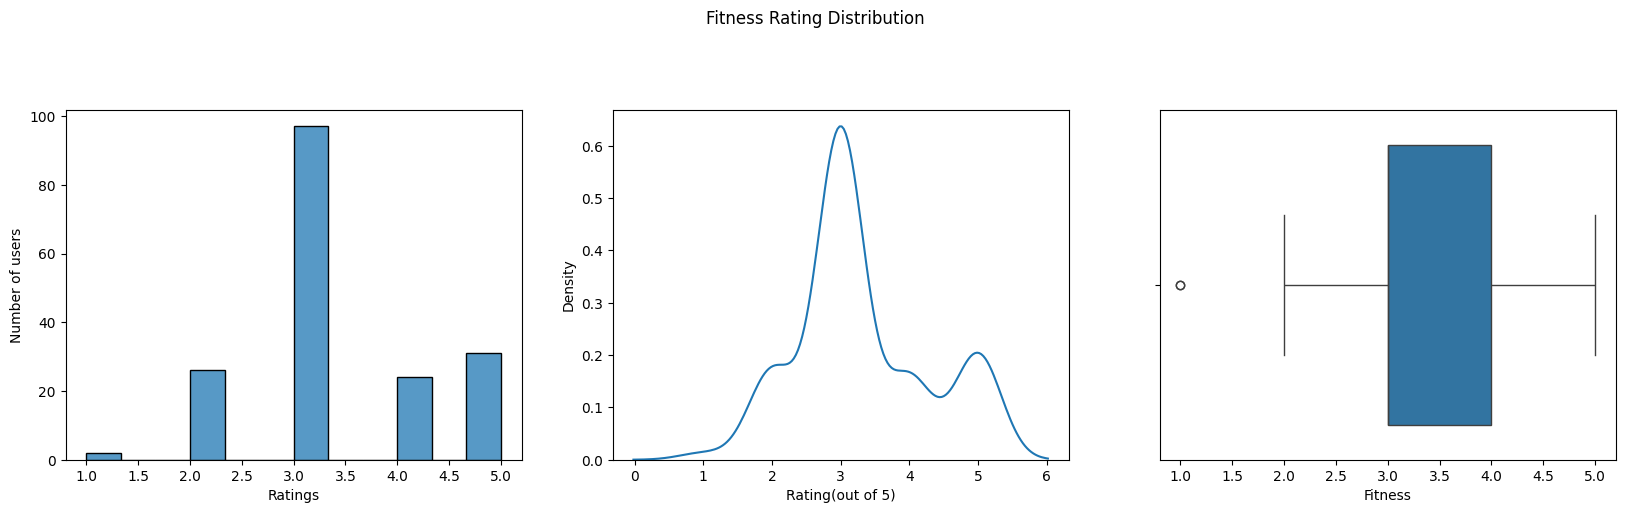

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x="Fitness")
plt.xlabel("Ratings")
plt.ylabel("Number of users")

plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Fitness")
plt.xlabel("Rating(out of 5)")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Fitness")

plt.suptitle("Fitness Rating Distribution")
plt.show()

<h2><b>Insights:</b></h2>


*   KP281 is most rated 3 as it is a low cost treadmill with not much usage(average per user).
*   KP481 is also mostly rated 3 which is surprising given the cost as compared to KP281 the rating does not reflect the cost difference. The users rate KP281 and KP481 also same but the number of users for KP281 is higher than KP481.
*   KP781 does justice to its price point as being rated mostly 5, which depicts its totally worth investing high money in this advanced treadmill.
*   The mean rating of overall products lies between 3-4.


<h3><b>5.5 Marital Status Analysis with respect to Product </b></h3>

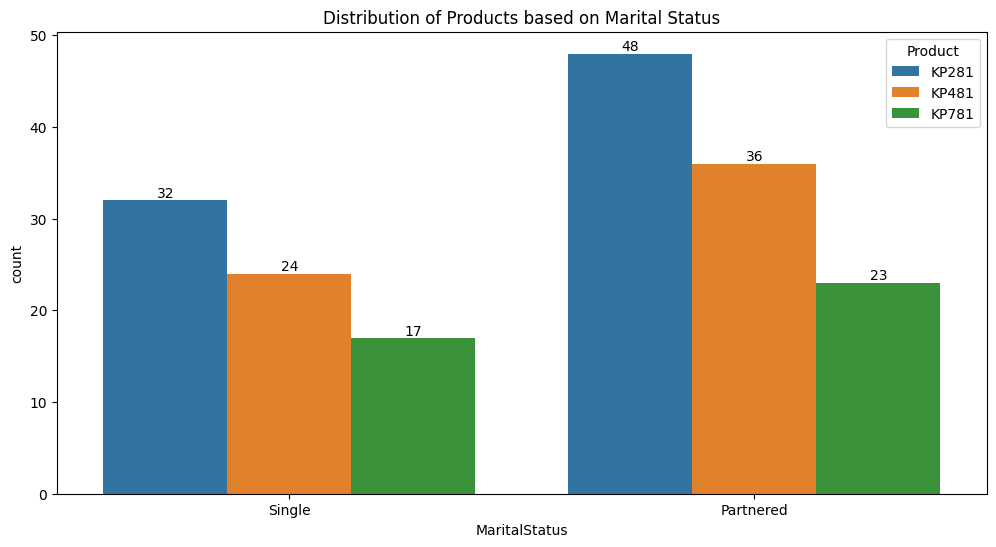

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='MaritalStatus', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Distribution of Products based on Marital Status')
plt.show()

<h2><b>Insights:</b></h2>


*   There is a clear rise in each and every product as we go from single to partnered which states that married people invest in the treadmill as they can afford for 2 people.
*   Singles tend to invest less as compared to married people.



<h3><b>5.6 Usage Analysis with respect to Product</b></h3>

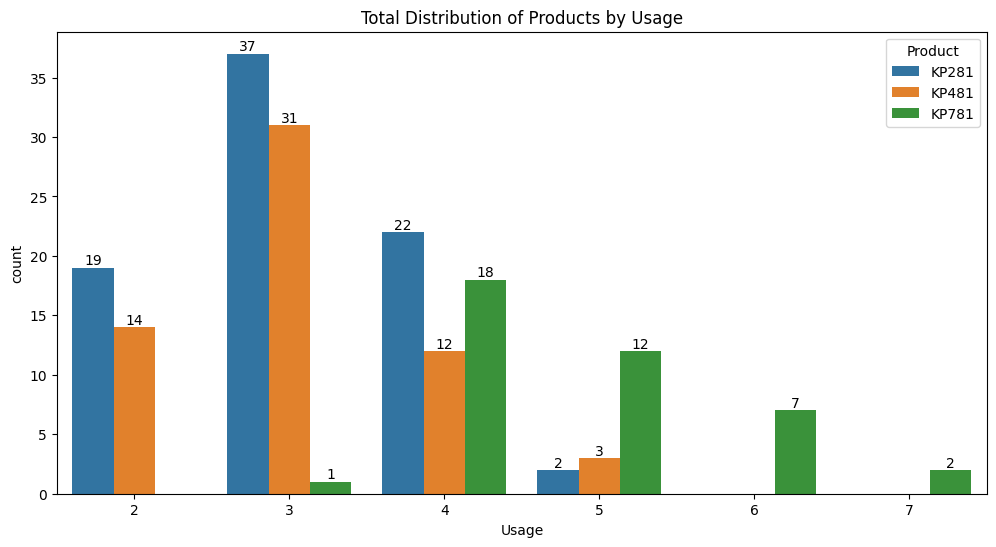

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='Usage', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Total Distribution of Products by Usage')
plt.show()

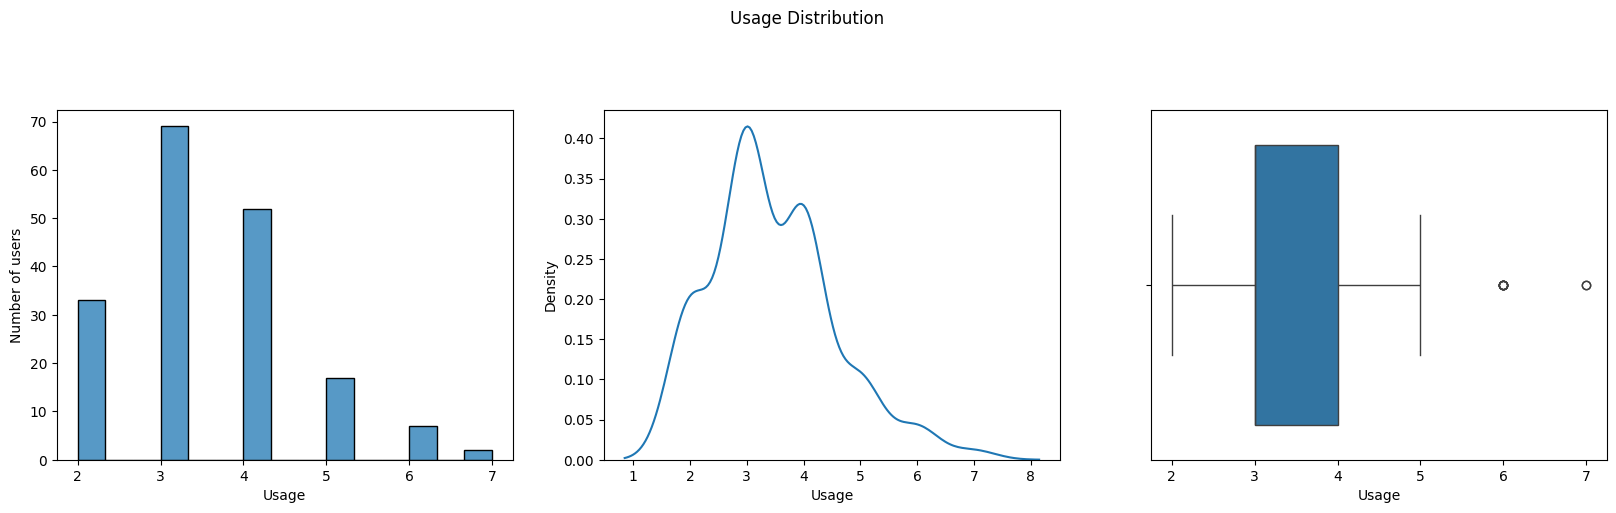

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x="Usage")
plt.xlabel("Usage")
plt.ylabel("Number of users")

plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Usage")
plt.xlabel("Usage")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Usage")

plt.suptitle("Usage Distribution")
plt.show()

<h2><b>Insights:</b></h2>


*   Most users Usage lies between 3-4 with few outliers who own KP781.
*   We can see clearly the correlation that users whose usage tend to be between 2-4 chose KP281 and KP481 whereas KP781 users are the ones whose usage is in the higher range . This shows that KP781 users are dedicated and fitness freaks who want to make their high invest count whereas for the low Usage people the number is still good considering they are relatively new to running and made less investment by choosing not so advanced treadmills.


<h3><b>5.7 Age Analysis with respect to Products</b></h3>

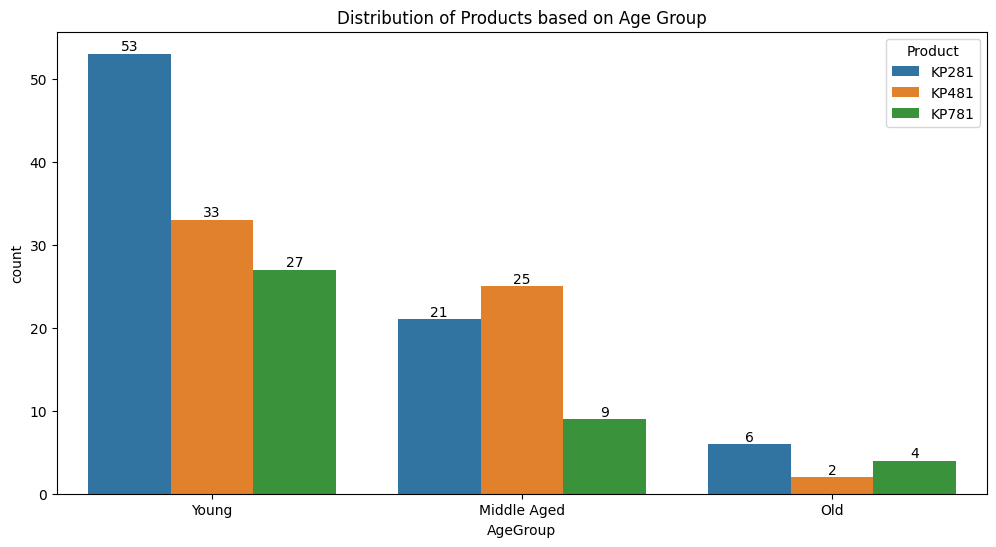

In [ ]:
plt.figure(figsize=(12,6))


histplt = sns.countplot(x='AgeGroup', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Distribution of Products based on Age Group')
plt.show()

<h2><b>Insights:</b></h2>


*   KP281 is the most preferred in the Young Age Bracket (18-29) users, followed by KP481 and KP781.
*   Unusually KP481 surges ahead in the Middle Age Bracket(30-40) users, which indicate that users tend to invest highly as age increases.
*   The percentage of KP781 of the total sales of the particular bracket is highest for Old Age Bracket (33.33%).


<h3><b>5.8 Income Analysis based on Products</b></h3>

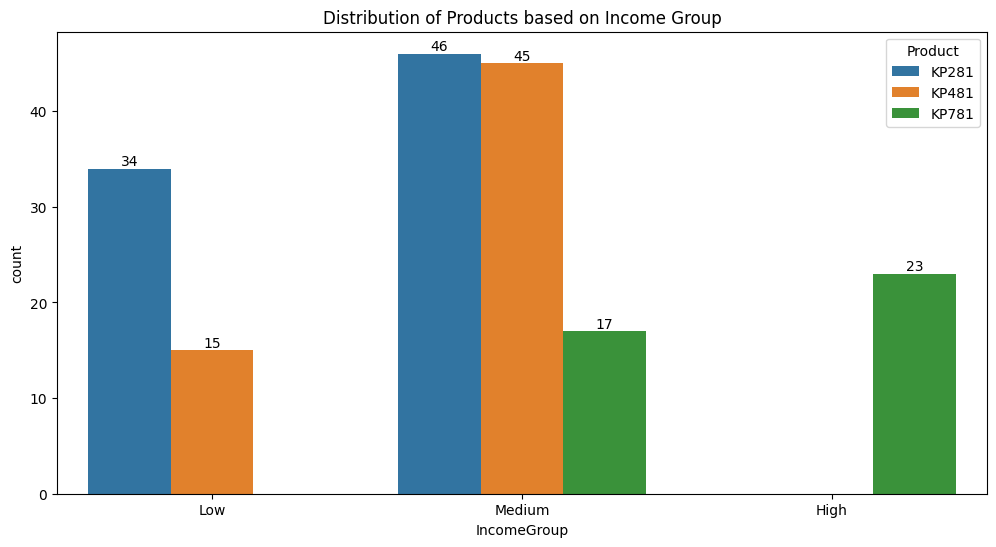

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='IncomeGroup', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Distribution of Products based on Income Group')
plt.show()

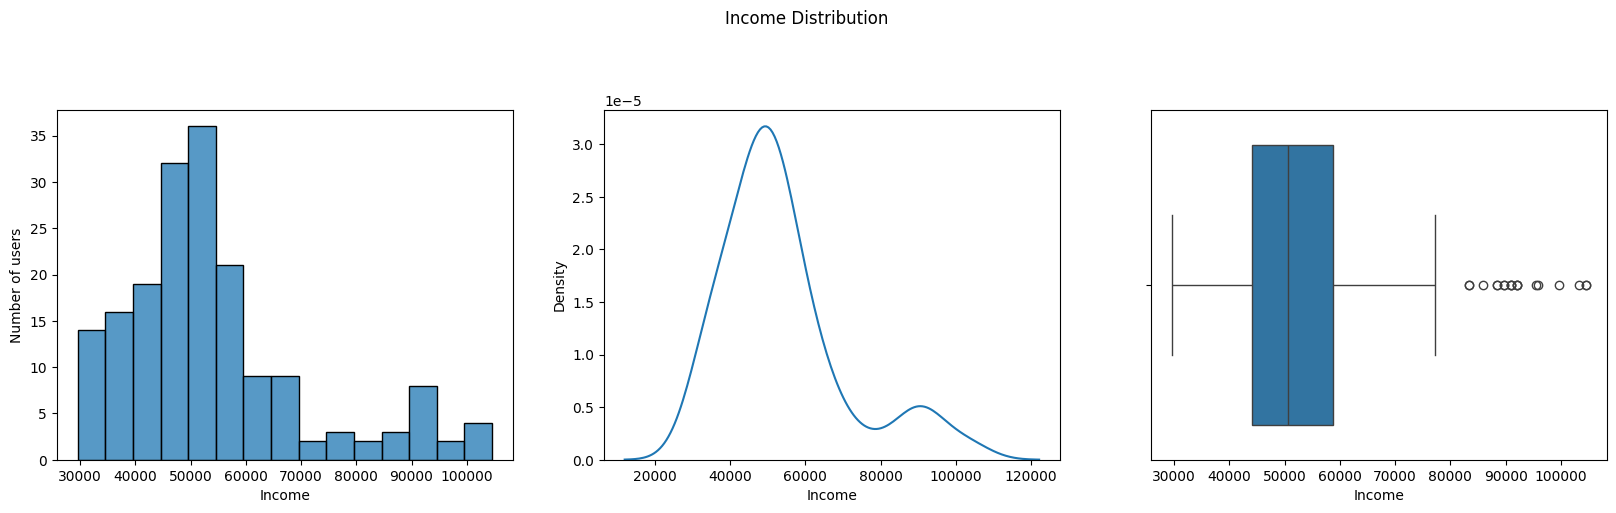

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x="Income")
plt.xlabel("Income")
plt.ylabel("Number of users")

plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Income")
plt.xlabel("Income")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Income")

plt.suptitle("Income Distribution")
plt.show()

<h2><b>Insights:</b></h2>


*   KP281 and KP481 are the top seller among users who fall under the Low Income bracket (29000-45000 USD) as they are reasonably cheaper than KP781.
*   KP281 and KP481 still is a popular choice in the Medium Income Bracket(45000-70000 USD) as many are new comers and don't want to invest highly at start.
*   KP781 being the most expensive is affordable for High Income Bracket (70000-105000 USD) users.
* Most users lie in the 45000-60000 USD range .


<h3><b>5.9 Miles Analysis based on Products</b></h3>

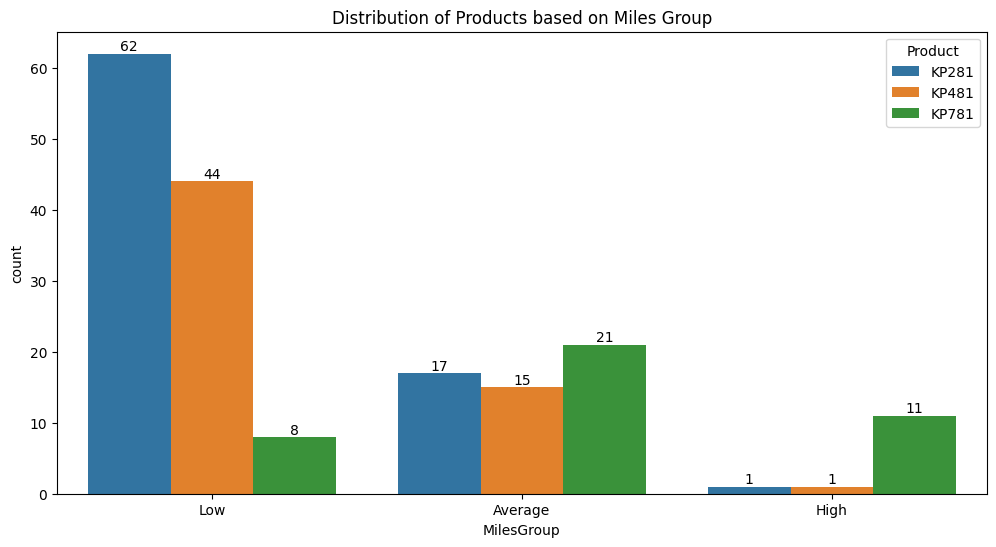

In [ ]:
plt.figure(figsize=(12,6))
histplt = sns.countplot(x='MilesGroup', hue='Product', data=df)
histplt.bar_label(histplt.containers[0])
histplt.bar_label(histplt.containers[1])
histplt.bar_label(histplt.containers[2])
plt.title('Distribution of Products based on Miles Group')
plt.show()

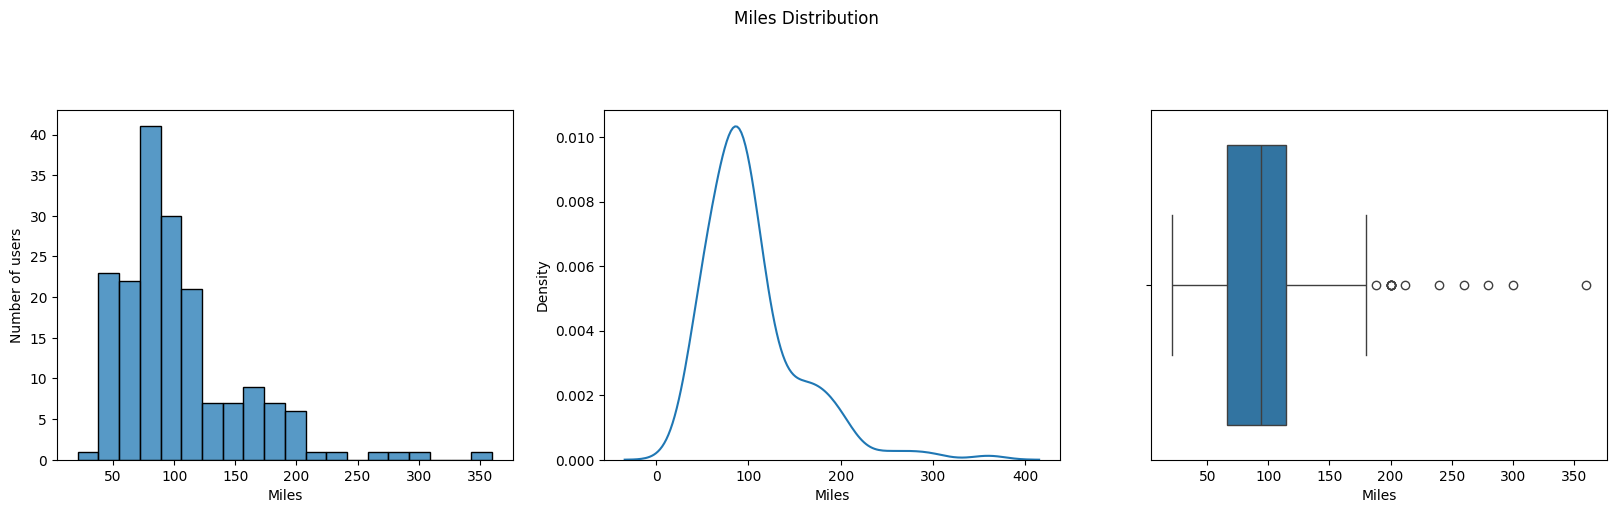

In [ ]:
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.histplot(data=df,x="Miles")
plt.xlabel("Miles")
plt.ylabel("Number of users")

plt.subplot(2,3,2)
sns.kdeplot(data=df,x="Miles")
plt.xlabel("Miles")

plt.subplot(2,3,3)
sns.boxplot(data=df,x="Miles")

plt.suptitle("Miles Distribution")
plt.show()

<h2><b>Insights:</b></h2>


*   We can clearly see that most users in the Low bracket have purchased either KP281 or KP481 as their usage is also less which reflects in the miles they have run.
*   KP781 , the advanced treadmill dominates the other products among people who are regualr runners and their usage is also high.
* Most people run in the range 80-120 as seen from the different plots.


<h3><b>5.10 HeatMap of the Data</b></h3>

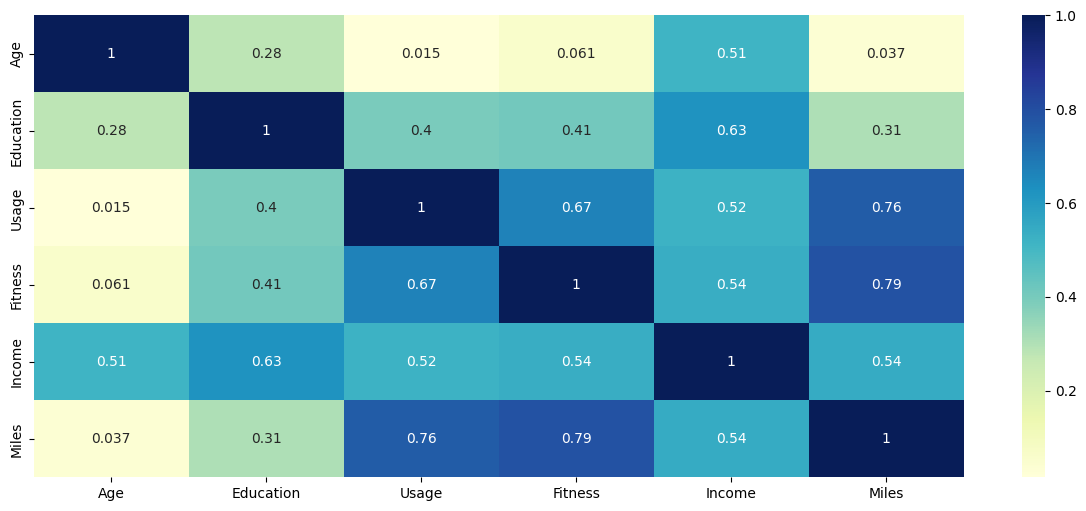

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(numeric_only=True), cmap="YlGnBu", annot=True)
plt.show()


<h2><b>Insights:</b></h2>

* <b>Age and Education:</b> There's a positive correlation of around 0.28 between Age and Education, indicating that older customers tend to have higher levels of education.

* <b>Age and Income:</b> There's a moderate positive correlation of approximately 0.51 between Age and Income, suggesting that as customers age, their income tends to rise.

* <b>Education and Income:</b> There's a relatively strong positive correlation of about 0.63 between Education and Income, indicating that customers with higher education levels tend to have higher incomes.

* <b>Usage and Fitness:</b> There's a strong positive correlation of roughly 0.67 between Usage and Fitness, indicating that customers who plan to use the treadmill more often tend to have higher fitness levels.

* <b>Fitness and Miles:</b> There's a strong positive correlation of approximately 0.79 between Fitness and Miles, suggesting that customers with higher fitness levels also expect to cover more miles per week.

* <b>Age and Fitness:</b> There's a weak positive correlation of around 0.06 between Age and Fitness. Similar correlations can be observed between Age and Usage, as well as Age and Miles.

<h3><b>5.11 PairPlot of the Data</b></h3>

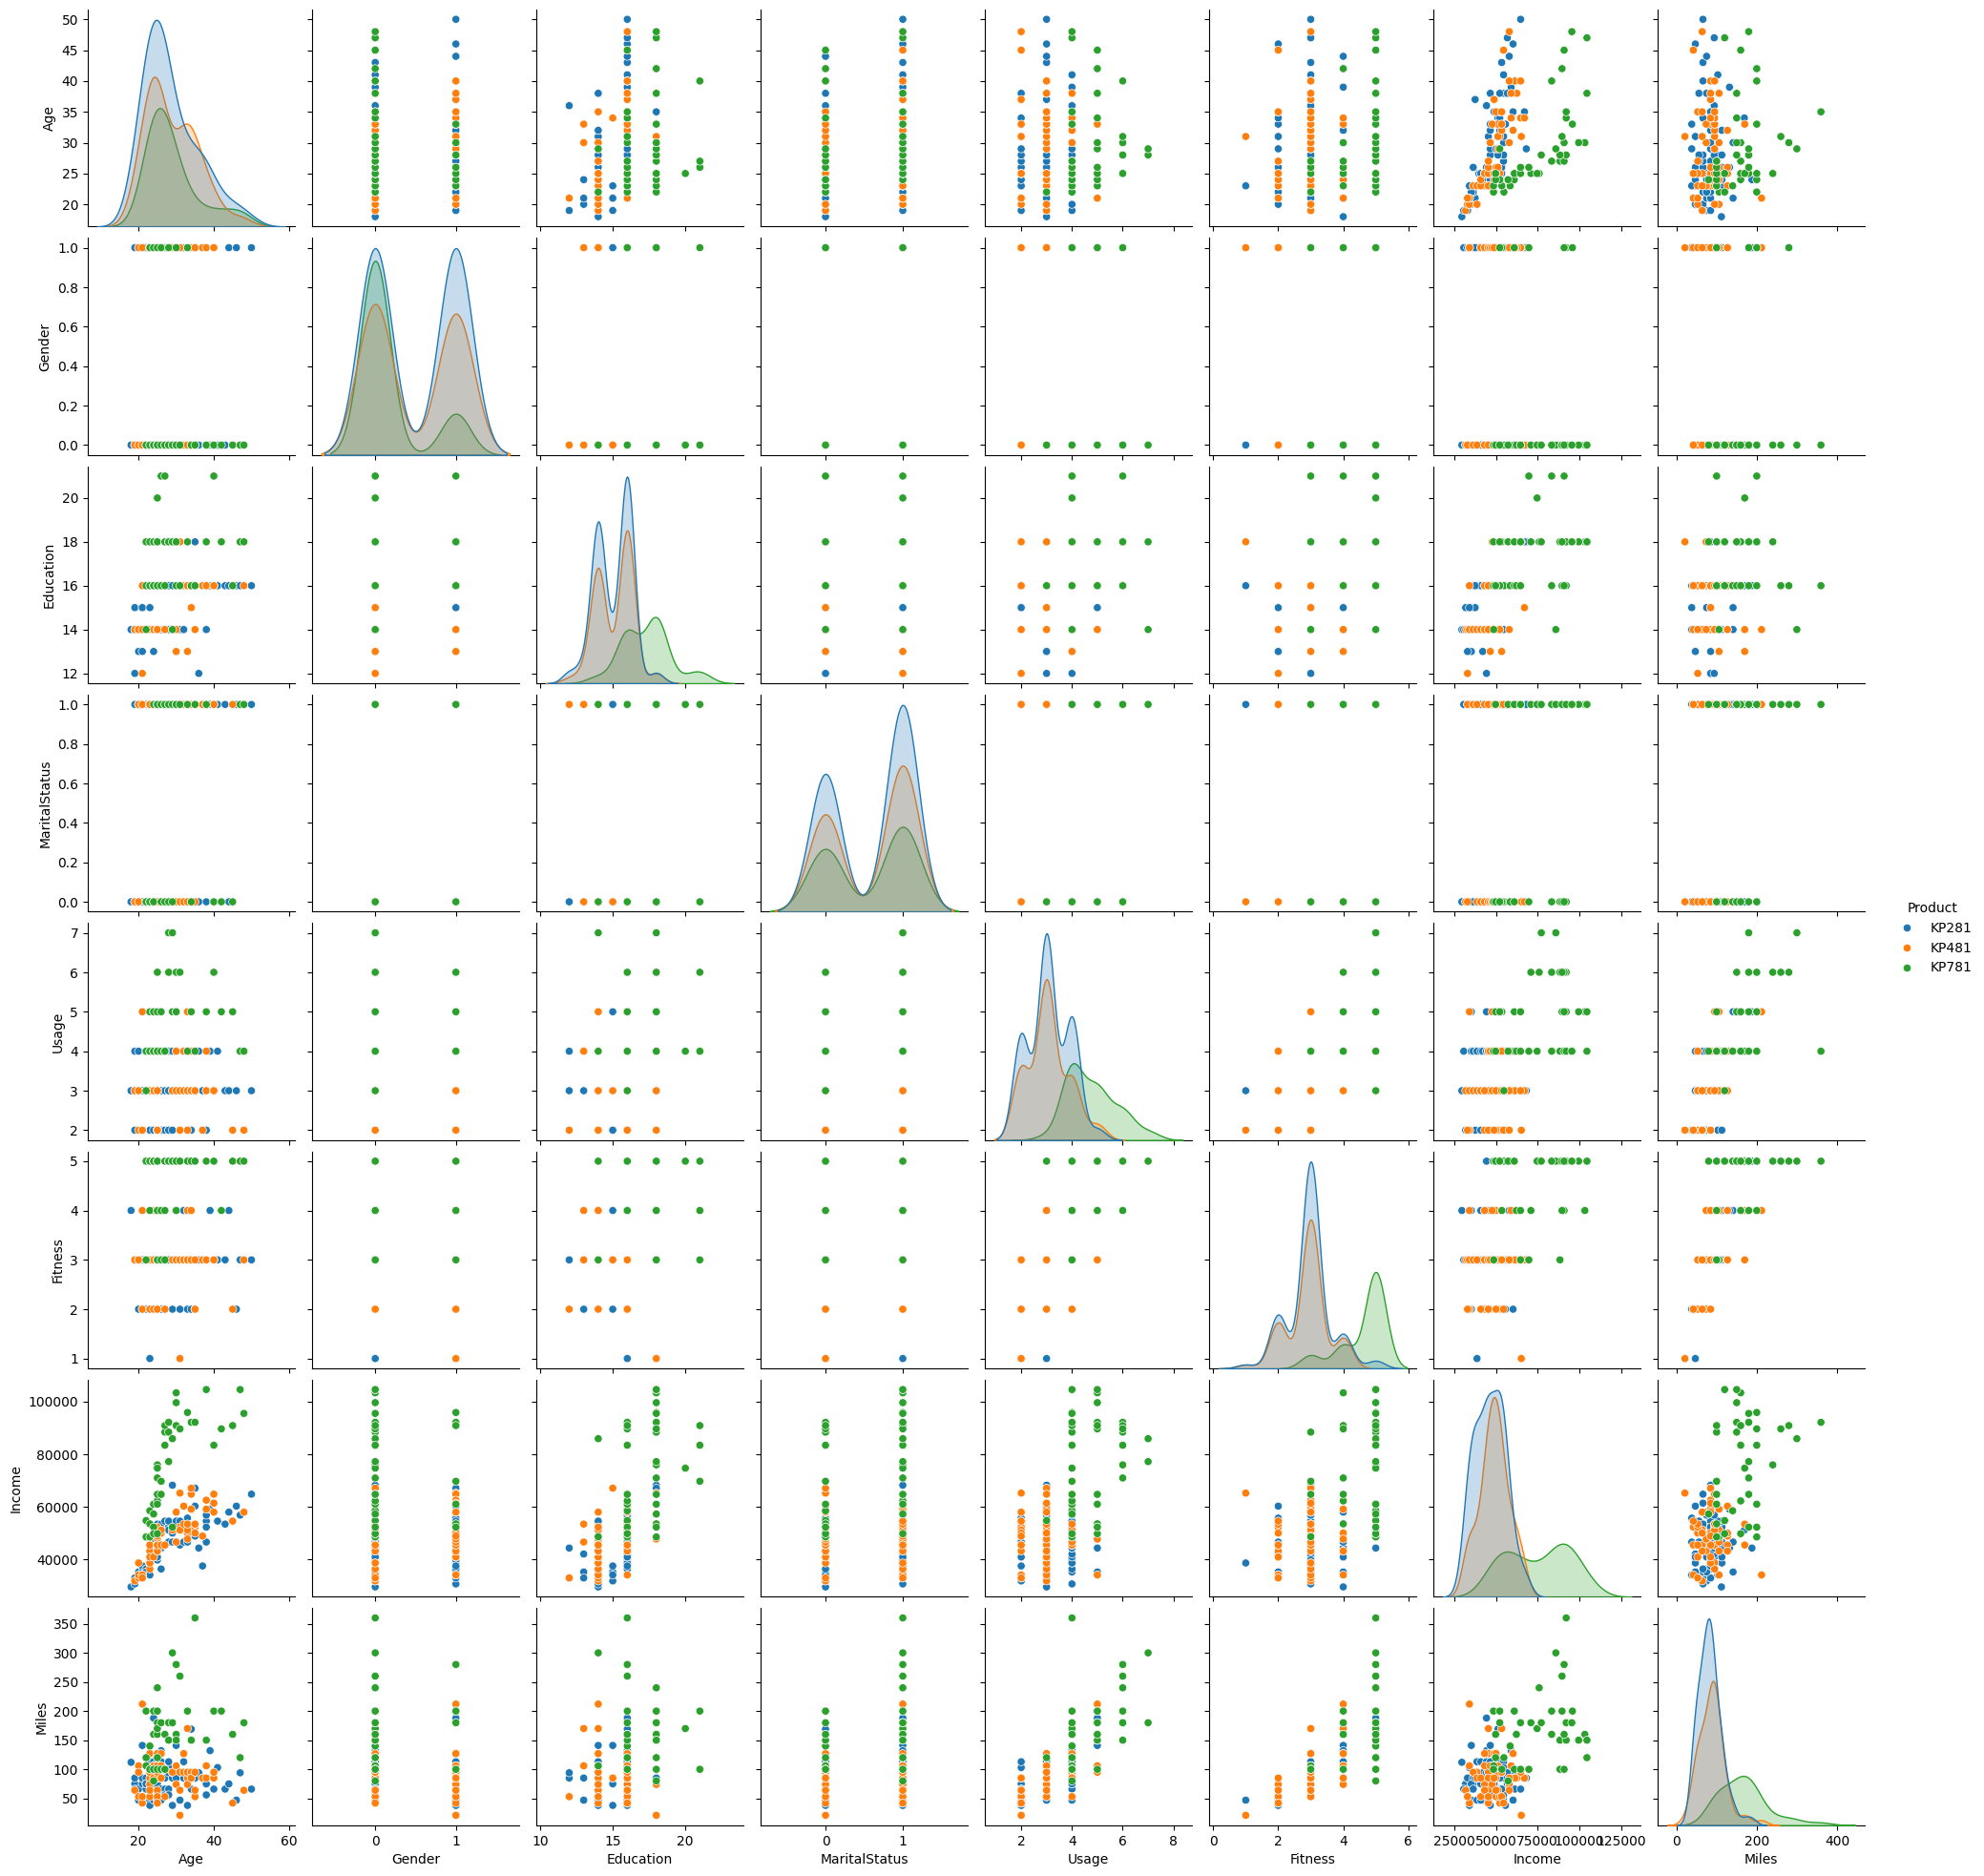

In [ ]:
df_copy['Gender'].replace(['Female', 'Male'], [1, 0], inplace=True)
df_copy['MaritalStatus'].replace(['Single', 'Partnered'], [0, 1], inplace=True)
sns.pairplot(df_copy, hue ='Product')

<h2><b>Insights:</b></h2>



* Here we can see age is highly correlated with income.

* Gender did not have any such correlation with other parameter that means it did not impact on purchasing.
* Education is highly correlated with income as its obvious. It also has impact on product purchased. Education also have significant correlation between fitness rating and usage of the treadmill.
* Marital Status has smaller correlation between Age and Income.
* Usage is extremely correlated with Fitness and Miles and has a higher correlation with Income and Education as well.
* Income is highly correlated with Product and Education. It also had good correlation with Age, usage, Fitness, Miles.
* From above we can say that Product is extremely correlated with Income, Education, Fitness, Usage along with Miles.
* We can say that Age and Education are indicator of Income which affect the product bought. The more advance the Product is the more its Usage and hence more the miles run which result into imroved Fitness rating



---
<br>
<h1><b>6. <u>Conditional and Marginal Probability</u></b></h1>


<h3><b>6.1 Based on Gender</b></h3>

In [ ]:
pd.crosstab(index=df['Gender'],columns=df['Product'],margins=True,normalize = True)*100

Product,KP281,KP481,KP781,All
Gender,,,,
Female,22.222222,16.111111,3.888889,42.222222
Male,22.222222,17.222222,18.333333,57.777778
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.2 Based on AgeGroup</b></h3>

In [ ]:
pd.crosstab(index=df['AgeGroup'],columns=df['Product'],margins=True, normalize=True)*100

Product,KP281,KP481,KP781,All
AgeGroup,,,,
Young,29.444444,18.333333,15.000000,62.777778
Middle Aged,11.666667,13.888889,5.000000,30.555556
Old,3.333333,1.111111,2.222222,6.666667
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.3 Based on Education</b></h3>

In [ ]:
pd.crosstab(index=df['Education'],columns=df['Product'],margins=True,normalize=True)*100

Product,KP281,KP481,KP781,All
Education,,,,
12,1.111111,0.555556,0.000000,1.666667
13,1.666667,1.111111,0.000000,2.777778
14,16.666667,12.777778,1.111111,30.555556
15,2.222222,0.555556,0.000000,2.777778
16,21.666667,17.222222,8.333333,47.222222
18,1.111111,1.111111,10.555556,12.777778
20,0.000000,0.000000,0.555556,0.555556
21,0.000000,0.000000,1.666667,1.666667
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.4 Based on Miles Group</b></h3>

In [ ]:
pd.crosstab(index=df['MilesGroup'],columns=df['Product'],margins=True,normalize= True)*100

Product,KP281,KP481,KP781,All
MilesGroup,,,,
Low,34.444444,24.444444,4.444444,63.333333
Average,9.444444,8.333333,11.666667,29.444444
High,0.555556,0.555556,6.111111,7.222222
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.5 Based on Marital Status</b></h3>

In [ ]:
pd.crosstab(index=df['MaritalStatus'],columns=df['Product'],margins=True,normalize= True)*100

Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,26.666667,20.000000,12.777778,59.444444
Single,17.777778,13.333333,9.444444,40.555556
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.6 Based on Usage</b></h3>

In [ ]:
pd.crosstab(index=df['Usage'],columns=df['Product'],margins=True,normalize= True)*100

Product,KP281,KP481,KP781,All
Usage,,,,
2,10.555556,7.777778,0.000000,18.333333
3,20.555556,17.222222,0.555556,38.333333
4,12.222222,6.666667,10.000000,28.888889
5,1.111111,1.666667,6.666667,9.444444
6,0.000000,0.000000,3.888889,3.888889
7,0.000000,0.000000,1.111111,1.111111
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.7 Based on Ratings</b></h3>

In [ ]:
pd.crosstab(index=df['Fitness'],columns=df['Product'],margins=True,normalize= True)*100

Product,KP281,KP481,KP781,All
Fitness,,,,
1,0.555556,0.555556,0.000000,1.111111
2,7.777778,6.666667,0.000000,14.444444
3,30.000000,21.666667,2.222222,53.888889
4,5.000000,4.444444,3.888889,13.333333
5,1.111111,0.000000,16.111111,17.222222
All,44.444444,33.333333,22.222222,100.000000


<h3><b>6.7 Based on Income Group</b></h3>

In [ ]:
pd.crosstab(index=df['IncomeGroup'],columns=df['Product'],margins=True,normalize= True)*100

Product,KP281,KP481,KP781,All
IncomeGroup,,,,
Low,18.888889,8.333333,0.000000,27.222222
Medium,25.555556,25.000000,9.444444,60.000000
High,0.000000,0.000000,12.777778,12.777778
All,44.444444,33.333333,22.222222,100.000000




---

<h1><b>7. <u>Customer Profiling</u></b></h1>

1. <b>Customer for KP281 Treadmill is</b>

    * Gender = Both Male and Female
    * Marital Status = Both Single and Partnered
    * Age = 18 to 30 years
    * Education Level = 14-16 years
    * Income = 29000-50000 USD
    * Fitness Rating = 3
    * Usage = 2 to 4 times in each week
    * Miles = Runs 60-100 miles per week
2. <b>Customer for KP481 Treadmill is</b>

    * Gender = Both Male and Female
    * Marital Status = Both Single and Partnered
    * Age = 20 to 40 years
    * Education Level = 14-16 years
    * Income = 29000-75000 USD
    * Fitness Rating = 3
    * Usage = 2 to 4 times in each week
    * Miles = Runs 80-120 miles per week

3. <b>Customer for KP781 Treadmill is</b>

    * Gender = <b> Mostly Males</b> users as the probability of Females is low.
    * Marital Status = <b> Mostly Married</b> users as the probability of singles buying is very low.
    * Age = 20 and Above
    * Education Level = 16-18 years
    * Income = <b>75000-105000</b>
    * Fitness Rating = 5
    * Usage = 4 to 6 times in each week
    * Miles = Runs 120-200 miles per week




---


<h1><b>8. <u>Reccomendations :</u></b></h1>



1. <b>Promote KP781 Model in USD40,000 to USD60,000 Income Bracket:</b> Given the favorable sales trend within this income range, prioritize marketing campaigns and promotional offers to attract customers towards the premium KP781 model.

2. <b>Address Gender Disparity in KP781 Sales:</b> Develop targeted promotions and trials aimed at increasing the purchase rate of the KP781 model among female customers, thereby bridging the existing sales gap.
3. <b>Create Health Awareness Programs for Specific Education Levels:</b> Launch awareness initiatives focusing on health benefits and product features tailored for individuals with 15, 20, and 21 years of education. Leverage the correlation between education and income to effectively target potential buyers.


4. <b>Customized Educational Content:</b> Develop educational content and resources tailored to different education levels, emphasizing the importance of fitness and the benefits of using Aerofit products


5. <b>Target Customers with Regular Treadmill Usage:</b> Identify and target customers who use treadmills at least three times a week. Offer exclusive trials and incentives to promote the premium KP781 model, highlighting its advanced features and benefits for regular users.

6. <b>Personalized Recommendations:</b> Utilize customer data to provide personalized recommendations and offers based on usage patterns, preferences, and fitness goals, enhancing customer satisfaction and loyalty.
7. <b>Implement Reward Points System to Encourage Regular Usage:</b> Launch a reward points program to incentivize customers to increase their weekly treadmill usage and track their fitness progress. Offer rewards for achieving milestones such as miles walked or run, encouraging customers to engage more with Aerofit products.

8. <b>Redeemable Points for Upgrades:</b> Allow customers to redeem accumulated reward points for upgrades to more advanced treadmill models, providing an additional incentive for continued usage and brand loyalty.
9. <b>Partner with Gyms and Fitness Centers:</b> Forge partnerships with gyms and fitness centers to showcase Aerofit products and offer exclusive deals to their members. This collaboration can increase brand visibility and attract potential customers who are already fitness-conscious.

10. <b>Community Engagement Initiatives:</b> Organize community events, challenges, and online forums to foster a sense of belonging among Aerofit users. Encourage customers to share their fitness journeys, tips, and experiences, creating a supportive community around the brand.

11. <b>Partnerships with Fitness Influencers:</b> Collaborate with fitness influencers and experts to endorse Aerofit products on social media platforms and other channels. Their endorsement can enhance brand credibility and reach a wider audience interested in fitness and health.

<br>


---

